In [1]:
import numpy as np
import matplotlib.pyplot as plt

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


Il modello di Ising è uno dei modelli più studiati nell'ambito della meccanica statistica. <br>
Diversi sistemi fisici (e.g. leghe binarie, materiali ferromagnetici) possono essere mappati con tale modello per poi studiarne le transizioni di fase (e.g. ferromagnete/paramagnete, liquido/gas). <br>
Nel caso unidimensionale vi è la soluzione corretta mentre in più dimensioni risolvere tale problema non è banale. <br>
Onsanger riuscì a trovare la soluzione per il caso 2D mentre in più dimensioni bisogna necessariamente ricorrere a teorie di campo medio. <br>
Trovare la soluzione significa individuare la funzione di partizione dalla quale si possono successivamente ricavare 
le grandezze d'interesse (energia interna, magnetizzazione..).

In questa esercitazione si vuole studiare e simulare il caso unidimensionale, ovvero un anello cosituito da spin discreti.  <br>
Sarà possibile confrontare i risultati derivanti dalla soluzione esatta con quelli ottenuti grazie alla simulazione.
Il sistema è descritto da 
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove si suppone che ciascuno degli $N$ spin possa interagire solo con i primi vicini e $s_{N+1} = s_{1}$. Ogni spin $s_i$ può assumere solo due valori interi {-1,1}, (bosoni).
$J$ è la costante di accoppiamento e segnala se il sistema è un ferromagnete ($J>0$) o un paramagete ($J<0$).

Tale sistema è un ensemble canonico caratterizzato dalla funzione di partizione
$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

dove
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
 $\beta=\frac{1}{k_b T} = \frac{1}{T}$. <br>
Adesso si possono ricavare le grandezze termodinamiche di interesse.

Inizialmente la configurazione di spin è casuale. La dinamica è regolata dall'algoritmo di Metropolis o di Gibbs; in tale esercitazione sono stati utilizzate entrambi. 
Ad ogni mossa si selezionano casualmente $N$ spin accettando o rigettando ogni candidato secondo l'algortimo scelto. Di conseguenza, ogni passo della simulazione sarà sufficientemente scorrelato dal precedente. Per tale motivo, il sistema si equilibra dopo poche mosse. <br>
A temperatura fissata si implementa il metodo "data-blocking" per i parametri termodinamici. I grafici sottostanti mostrano il valore delle grandezza d'interesse dell'ultimo blocco (somma progressiva ed errore) contro la temperatura. 
Gli errori sono piccoli rispetto alla scala con la quale varia la funzione quindi non si vedono.

Precedentemente è stato citato l'algoritmo di Gibbs che merita di essere descritto.
Dati $N$ spin, la probabilità che uno spin possa avere spin up (o down) è fissata ed indipendente dal resto degli spin, infatti la condizionata per avere spin $s_i=1$ è

$p(s_k=+1|{s_j : j\neq i)}) = \Large \frac{e^{-\beta H(s_1,..,1,..s_N)}}{e^{-\beta H(s_1,..,1,..s_N)}+e^{-\beta H(s_1,..,-1,..s_N)}}$

Una mossa di questo tipo viene sempre accettata con probabilità 1.

Tornando alla simulazione, le grandezze d'interesse sono:

- **Energia interna** per spin (con $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

Le soluzioni sono compatibili con quella ottenuta per via teorica.
A basse temperature il sistema tende al ground state che in questo caso corrisponde ad una configurazione dove tutti gli spin sono up o down (perchè è stata scelta $J=1$).
Tale risultato è stato ottenuto a campo nullo dunque quest'ultime configurazioni sono equiprobabili.
All'aumentare della temperatura, l'energia cresce con un andamento proporzionale alla tangente iperbolica.


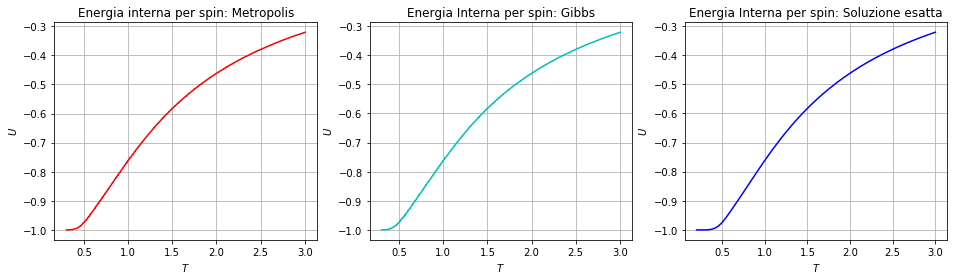

In [11]:
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

fig, (f1, f2, f3) = plt.subplots(1,3,figsize=(16,4))

z, f, error= np.loadtxt("./Grafici/GraficiU-CS-CHI/DatiU", usecols=(0,1,2), delimiter=' ', unpack='true')
f1.errorbar(z,f, yerr=error, color='r')
f1.set_title('Energia interna per spin: Metropolis')
f1.set_ylabel("$U$")
f1.set_xlabel("$T$")
f1.grid(True)

z, f, error= np.loadtxt("./Grafici/GraficiU-CS-CHI(Gibbs)/DatiU", usecols=(0,1,2), delimiter=' ', unpack='true')
f2.errorbar(z,f,  yerr=error, color='c')
f2.set_title('Energia Interna per spin: Gibbs')
f2.set_ylabel("$U$")
f2.set_xlabel("$T$")
f2.grid(True)


f3.plot(T, e,color='b')
f3.set_title('Energia Interna per spin: Soluzione esatta')
f3.set_ylabel("$U$")
f3.set_xlabel("$T$")
f3.grid(True)
plt.show()

- **Capacità termica** ($h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T} = 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

La capacità termica è una funzione risposta poichè descrive come si comporta il sistema a causa di un cambiamento di temperatura.

A basse temperature la capacità termica tende a zero. Questo è dovuto al fatto che il sistema è poco suscettibile al cambiamento della sua configurazione, è ancora troppo "freddo". <br>
All'aumentare della temperatura si nota l'anomalia di Schotty: la capacità termica ha un massimo.
È un'anomalia poichè in generale, la capacità termica rimane costante con la temperatura.
Per esempio, i gradi di libertà interni delle molecole (vibrazionale, rotazionale) presentano un asintoto. <br>
In un intorno destro del range si nota che $c_v$ tende a zero.

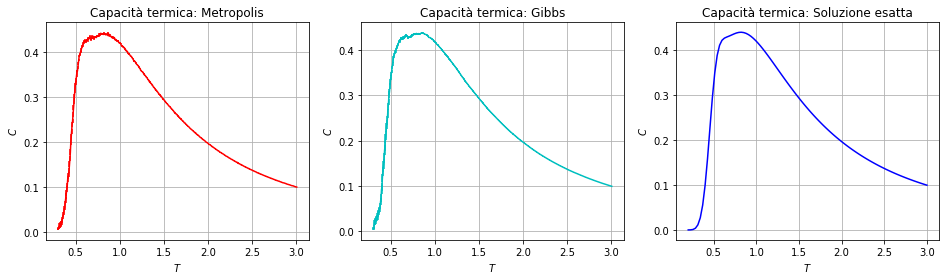

In [19]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

fig, (f1, f2, f3) = plt.subplots(1,3,figsize=(16,4))

z, f, error= np.loadtxt("./Grafici/GraficiU-CS-CHI/DatiCS", usecols=(0,1,2), delimiter=' ', unpack='true')
f1.errorbar(z,f, yerr=error, color='r')
f1.set_title('Capacità termica: Metropolis')
f1.set_ylabel("$C$")
f1.set_xlabel("$T$")
f1.grid(True)

z, f, error= np.loadtxt("./Grafici/GraficiU-CS-CHI(Gibbs)/DatiCS", usecols=(0,1,2), delimiter=' ', unpack='true')
f2.errorbar(z,f, yerr=error, color='c')
f2.set_title('Capacità termica: Gibbs')
f2.set_ylabel("$C$")
f2.set_xlabel("$T$")
f2.grid(True)


f3.plot(T, heat,color='b')
f3.set_title('Capacità termica: Soluzione esatta')
f3.set_ylabel("$C$")
f3.set_xlabel("$T$")
f3.grid(True)
plt.show()


- La suscettività magnetica (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

Anche tale grandezza è una funzione risposta. La perturbazione è la variazione di campo esterno. <br>

A basse tempertura sembra divergere: una piccola variazione del campo provoca una risposta particolarmente accentuata da parte del sistema. 
Al crescere della temperatura, $\chi$ decresce in modo monotono fino ad annullarsi a causa dell'importante contributo entropico che domina il sistema.


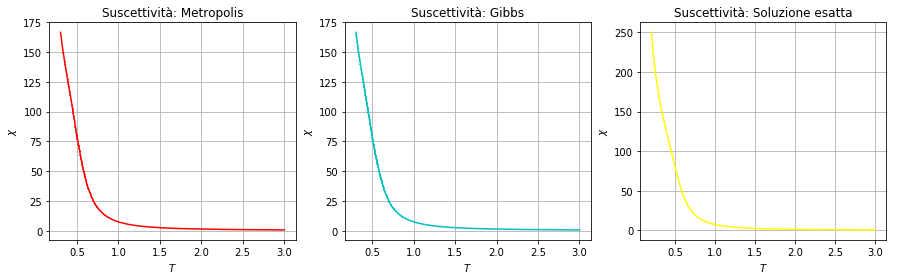

In [22]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

fig, (f1, f2, f3) = plt.subplots(1,3,figsize=(15,4))

z, f, error= np.loadtxt("./Grafici/GraficiU-CS-CHI/DatiCHI", usecols=(0,1,2), delimiter=' ', unpack='true')
f1.errorbar(z,f,yerr=error,color='r')
f1.set_title('Suscettività: Metropolis')
f1.set_ylabel("$\chi$")
f1.set_xlabel("$T$")
f1.grid(True)

z, f, error= np.loadtxt("./Grafici/GraficiU-CS-CHI(Gibbs)/DatiCHI", usecols=(0,1,2), delimiter=' ', unpack='true')
f2.errorbar(z,f,color='c', yerr=error)
f2.set_title('Suscettività: Gibbs')
f2.set_ylabel("$\chi$")
f2.set_xlabel("$T$")
f2.grid(True)


plt.plot(T, X, color='yellow')
f3.set_title('Suscettività: Soluzione esatta')
f3.set_ylabel("$\chi$")
f3.set_xlabel("$T$")
f3.grid(True)
plt.show()

- La **magnetizzazione** ($h = 0.02$):

In più dimensioni, i materiali ferromagnetici presentano una transizione si fase alla temperatura di Curie a campo nullo.
Questo non è vero per il caso in esame poichè per $T=0$, la magnetizzazione è nulla. Infatti
non si osserva il tipico andamento $\sqrt{T-T_c}$ per $T<T_c$ con dove $T_c$ è la temperatura di Curie.
La magnetizzazione è definita nel seguente modo

$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

Prima di tutto è interessante notare che per $T<0.5$ si osservano delle strane fluttuazioni. Questo è legato al fatto che il sistema non è molto ergodico a basse temperature quindi molte mosse sono rigettate dall'algortimo di Metropolis.
L'algoritmo non campiona bene la distribuzione di probabilità.

La rimanente parte del grafico è in perfetto accordo con quella ottenuta per via teorica.
A basse temperature, $M$ tende ad uno poichè tutti gli spin sono paralleli al campo esterno (positivo). 
Al diminuire di $T$, $M$ tende a zero perchè il contributo entropico domina su quello energetico.

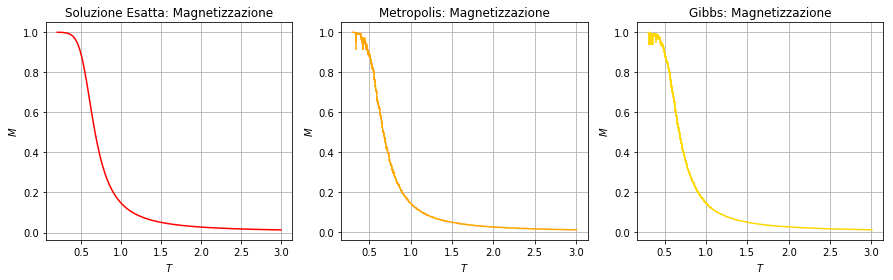

In [24]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

fig, (f1, f2, f3) = plt.subplots(1,3,figsize=(15,4))

f1.plot(T, M, color='red')
f1.set_ylabel("$M$")
f1.set_xlabel("$T$")
f1.set_title("Soluzione Esatta: Magnetizzazione")
f1.grid(True)

z, f, error= np.loadtxt("./Grafici/GraficiM/DatiM", usecols=(0,1,2), delimiter=' ', unpack='true')
f2.errorbar(z,f, yerr=error,color='orange')
f2.set_ylabel("$M$")
f2.set_xlabel("$T$")
f2.set_title("Metropolis: Magnetizzazione")
f2.grid(True)

z, f, error= np.loadtxt("./Grafici/GraficiM(Gibbs)/DatiM", usecols=(0,1,2), delimiter=' ', unpack='true')
f3.errorbar(z,f,yerr=error,color='gold')
f3.set_ylabel("$M$")
f3.set_xlabel("$T$")
f3.set_title("Gibbs: Magnetizzazione")
f3.grid(True)

plt.show()